# **Customer Lifetime Value**

**Created by : Kevin Matthew Aditya**

# 1. Business Understanding

### 1.1. Domain Knowledge
Dalam industri asuransi otomotif yang semakin kompetitif, perusahaan menghadapi tantangan besar dalam mempertahankan loyalitas pelanggan, mengingat banyaknya pilihan yang tersedia untuk memenuhi kebutuhan asuransi kendaraan. Salah satu kunci untuk meraih keberhasilan jangka panjang adalah memahami nilai pelanggan sepanjang siklus hidup mereka, yang sering diukur dengan Customer Lifetime Value (CLV).

Customer Lifetime Value (CLV) adalah perkiraan total keuntungan yang dapat diperoleh sebuah perusahaan dari seorang pelanggan selama hubungan mereka. CLV memberi gambaran jelas tentang kontribusi seorang pelanggan terhadap pendapatan perusahaan dan menjadi panduan dalam pengambilan keputusan strategis, termasuk pemasaran, alokasi anggaran, dan peningkatan pengalaman pelanggan. Dengan memanfaatkan CLV, perusahaan asuransi otomotif dapat lebih fokus pada pelanggan yang berpotensi memberikan keuntungan berkelanjutan.

Penerapan CLV memungkinkan perusahaan untuk mengidentifikasi pelanggan yang memiliki potensi untuk menjadi loyal dan memberikan pendapatan jangka panjang. Hal ini memungkinkan perusahaan untuk lebih bijak dalam mengalokasikan anggaran pemasaran dan layanan pelanggan, serta mengoptimalkan strategi retensi, seperti menawarkan produk tambahan, diskon, atau layanan yang disesuaikan. Di sisi lain, CLV juga membantu perusahaan untuk mengurangi biaya akuisisi pelanggan baru, yang seringkali lebih mahal, serta mengoptimalkan keuntungan dari pelanggan yang sudah ada. Dengan demikian, memahami CLV tidak hanya meningkatkan efisiensi operasional tetapi juga memperkuat posisi kompetitif perusahaan dalam pasar yang semakin padat.

### 1.2. Problem Statement
Memprediksi Customer Lifetime Value (CLV) dengan akurat menjadi tantangan utama bagi perusahaan asuransi otomotif dalam menghadapi persaingan yang ketat. Untuk itu, perusahaan perlu mengembangkan model prediksi yang dapat memperhitungkan berbagai faktor yang memengaruhi CLV secara efektif. Penggunaan teknik machine learning diperlukan untuk mengidentifikasi pola dan tren yang dapat memprediksi nilai pelanggan secara akurat, sehingga perusahaan dapat mengoptimalkan strategi pemasaran dan retensi pelanggan, serta meningkatkan efisiensi operasional.

### 1.3. Goals
Tujuan utama dari pengembangan model ini adalah membangun algoritma machine learning berbasis regresi dengan tingkat akurasi dan predictive power yang tinggi untuk memprediksi Customer Lifetime Value (CLV) secara akurat pada perusahaan asuransi otomotif. Model ini akan dirancang untuk memaksimalkan kemampuan dalam menangkap pola dan hubungan kompleks antar variabel. Dengan akurasi dan predictive power yang tinggi, model machine learning diharapkan dapat menjadi alat yang efektif bagi perusahaan untuk menyusun strategi pemasaran berbasis data, meningkatkan retensi pelanggan, dan mengoptimalkan efisiensi operasional.

### 1.4. Metric Evaluation
Metric Evaluation adalah alat atau metode yang digunakan untuk mengukur kinerja suatu model, algoritma, atau sistem berdasarkan data tertentu. Metric Evaluation yang akan digunakan dalam pemodelan ini adalah:
1. MAE (Mean Absolute Error): MAE diperoleh dengan cara menghitung nilai rata-rata dari nilai absolute residual (selisih nilai prediksi dan nilai aktual). Semakin kecil nilai MAE, artinya semakin baik pula kinerja model. Kita menggunakan metrics ini karena MAE dapat bekerja dengan baik saat dataset memiliki banyak outlier.
2. RMSE (Root Mean Squared Error): RMSE dihitung dengan meng-akarkuadrat-kan nilai MSE yaitu rata-rata dari kuadrat residual (selisih nilai prediksi dan nilai aktual). Dibandingkan dengan MAE, RMSE akan memberi bobot lebih tinggi pada error sehingga menghasilkan nilai yang lebih besar dibanding MAE. Sama seperti MAE, kita menginginkan nilai RMSE yang sekecil mungkin. Kita menggunakan metrics ini karena rentang nilai dari Y pada dataset ini tidak terlalu besar (berkisar antara ribuan hingga puluhan ribu).
3. MAPE (Mean Absolute Percentage Error): MAPE merupakan ukuran kesalahan yang dinyatakan dalam bentuk persentase, yang dihitung dengan membagi nilai absolute residual (selisih antara nilai prediksi dan nilai aktual) dengan nilai aktual
4. R squared: R-Square menjelaskan seberapa besar variasi nilai Y yang dapat dijelaskan oleh model. Nilainya biasanya berkisar antara 0-1, semakin mendekati 1 artinya model semakin baik. Metrics ini digunakan karena lebih mudah dipahami saat menginterpretasikan kinerja model kepada orang lain.

### 1.5. Analytical Approach
Langkah - langkah dan metode yang digunakan dalam pengolahan data serta pemodelan adalah sebagai berikut:
1. Business Understanding
1. Data Understanding
1. Exploratory Data Analysis (EDA)
1. Data Preprocessing
1. Modeling
1. Conculusion and Reccomendations

# 2. Data Understanding

### 2.1. Import Libraries
Mengimport library yang dibutuhkan untuk eksplorasi dataset.

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# ML Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, learning_curve

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

### 2.2. Load Dataset

In [2]:
# Menampilkan dataset Customer Lifetime Value
df = pd.read_csv('data_customer_lifetime_value.csv')
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


### 2.3. Data Information

In [3]:
# Cek informasi dataset
# Tipe data dalam dataset berisikan data tipe 'object' dan 'float'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


* Dari informasi diatas diketahui terdapat 11 kolom pada dataset ini. Kolom `Customer Lifetime Value` nantinya akan digunakan sebagai target dan 10 kolom lainnya akan menjadi variabel independen.
* Terdapat tujuh kolom yang berisi data kategorik, diantaranya adalah `Vehicle Class`, `Coverage`, `Renew Offer type`, `Employment Status`, `Marital Status`, `Education`, dan `Number of Policies`. `Number of Policies` akan dianggap sebagai data kategorik walaupun tipe datanya adalah integer.
* Selain dari tujuh data kategorik diatas, terdapat empat data numerik, yaitu `Monthly Premium Auto`, `Total Claim Amount`, `Income`, dan `Customer Lifetime Value`.

### 2.4. Attributes Information

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Jenis/tipe mobil |
| Coverage | Object | Jenis proteksi/manfaat asuransi yang dipilih |
| Renew Offer Type | Object | Tipe pembaruan asuransi yang dipilih saat periode polis berakhir |
| EmploymentStatus | Object | Status pekerjaan |
| Marital Status | Object | Status pernikahan |
| Education | Object | Tingkat pendidikan terakhir |
| Number of Policies | Float | Jumlah polis yang diambil |
| Monthly Premium Auto | Float | Jumlah premi yang dibayarkan setiap bulan (USD) |
| Total Claim Amount | Float | Total klaim yang telah dibayarkan asuransi kepada pelanggan (USD) |
| Income | Float | Pendapatan pelanggan |
| Customer Lifetime Value | Float | Nilai CLV pelanggan |

### 2.5. Descriptive Statistics Information

In [4]:
# Menampilkan statistik deskriptif dari numerical & categorical variable
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


# 3. Exploratory Data Analysis (EDA)

### 3.1. Distribution of Customer Lifetime Value (Target)

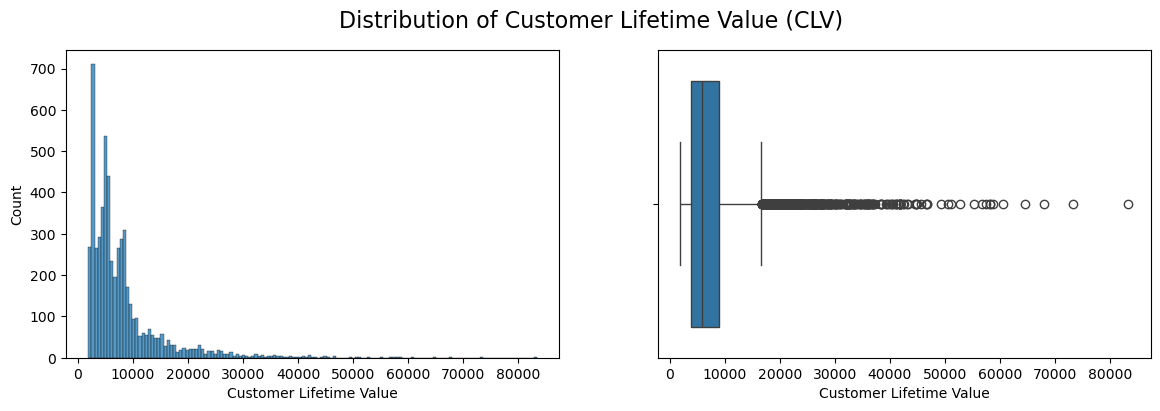

In [5]:
fig = plt.figure(figsize=(14,4))

fig.suptitle('Distribution of Customer Lifetime Value (CLV)', size=16)

plt.subplot(1,2,1)
sns.histplot(data=df, x='Customer Lifetime Value')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Customer Lifetime Value');

Berdasarkan histogram dan boxplot dapat dilihat bahwa:
- Nilai CLV memiliki distribusi tidak normal dengan skewed ke kanan (right skewed), menunjukan bahwa sebagian besar pelanggan memiliki nilai CLV yang relatif rendah (di bawah 10.000), sementara hanya sedikit pelanggan yang memiliki nilai CLV sangat tinggi.
- Terdapat banyak outlier di sisi kanan, yang mengindikasikan beberapa pelanggan memiliki CLV yang jauh lebih tinggi dibandingkan mayoritas pelanggan.

### 3.2. Distribution of Numerical Feature

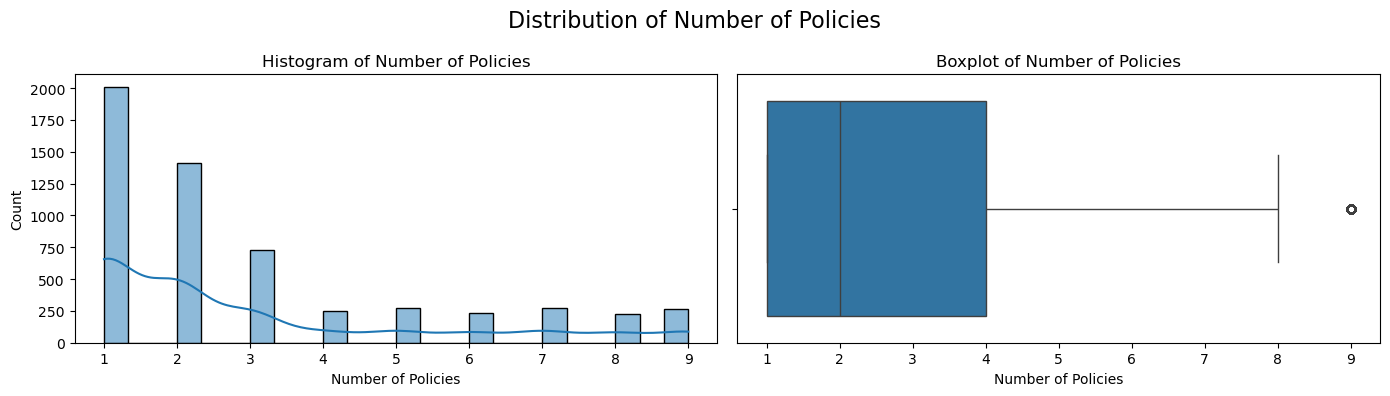

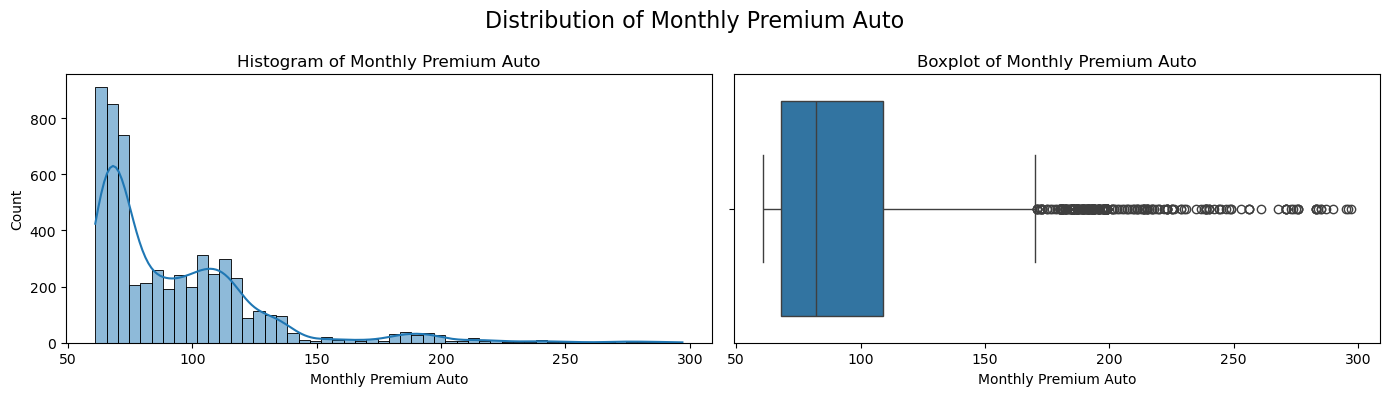

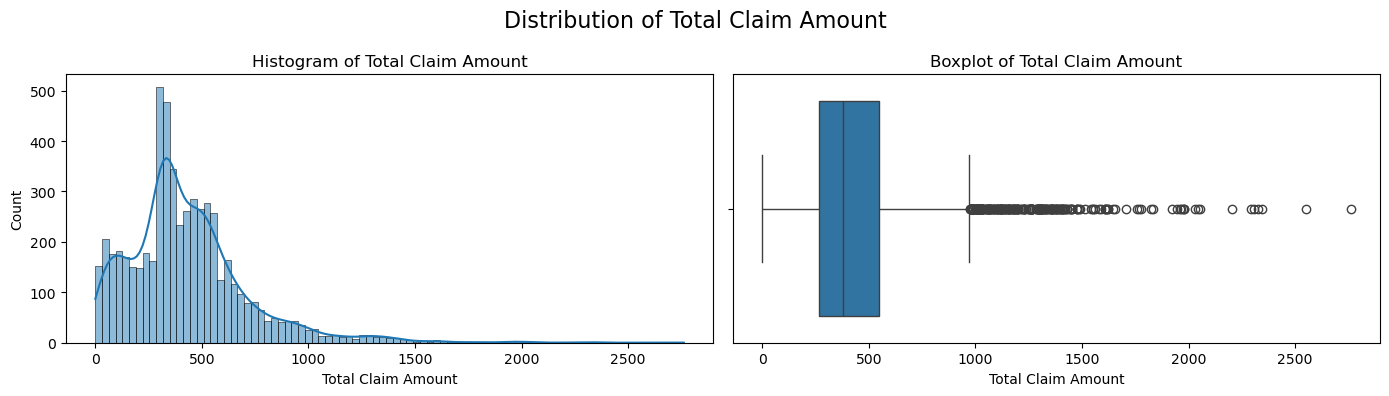

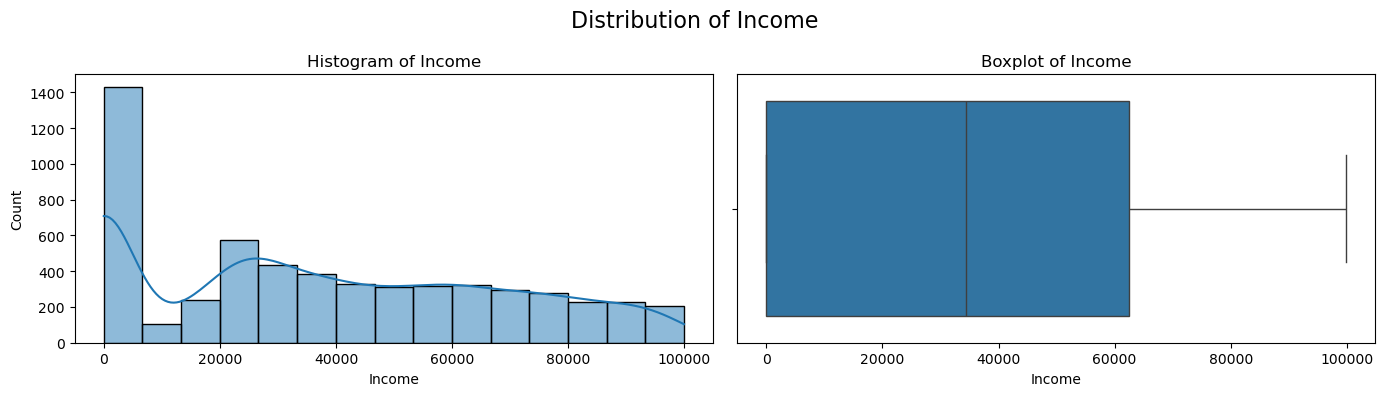

In [6]:
# Filter hanya kolom numerik, kecuali 'Customer Lifetime Value'
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop('Customer Lifetime Value')  # Hapus kolom CLV

# Loop untuk setiap variabel numerik
for col in numerical_columns:
    fig = plt.figure(figsize=(14, 4))
    fig.suptitle(f'Distribution of {col}', size=16)
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


Berdasarkan histogram dan boxplot yang diatas dapat terlihat bahwa:

- Semua variabel diatas tidak terdistribusi normal. Pada variabel Monthly Premium Auto dan Total Claim Amount memiliki distribusi yang skewed ke kanan, dan pada variabel Income memiliki distribusi skewed ke kiri.

- Terdapat outlier pada variabel:
  - Number of Policies: Pelanggan dengan lebih dari 8 polis.
  - Monthly Premium Auto: Pelanggan dengan premi lebih tinggi dari mayoritas.
  - Total Claim Amount: Klaim dengan nilai di atas mayoritas klaim.

Kesimpulannya, data ini tidak terdistribusi normal secara keseluruhan dan memiliki banyak outlier yang mencerminkan adanya variabilitas tinggi dalam pola pelanggan.

### 3.3. Correlation of Numerical Feature vs Target

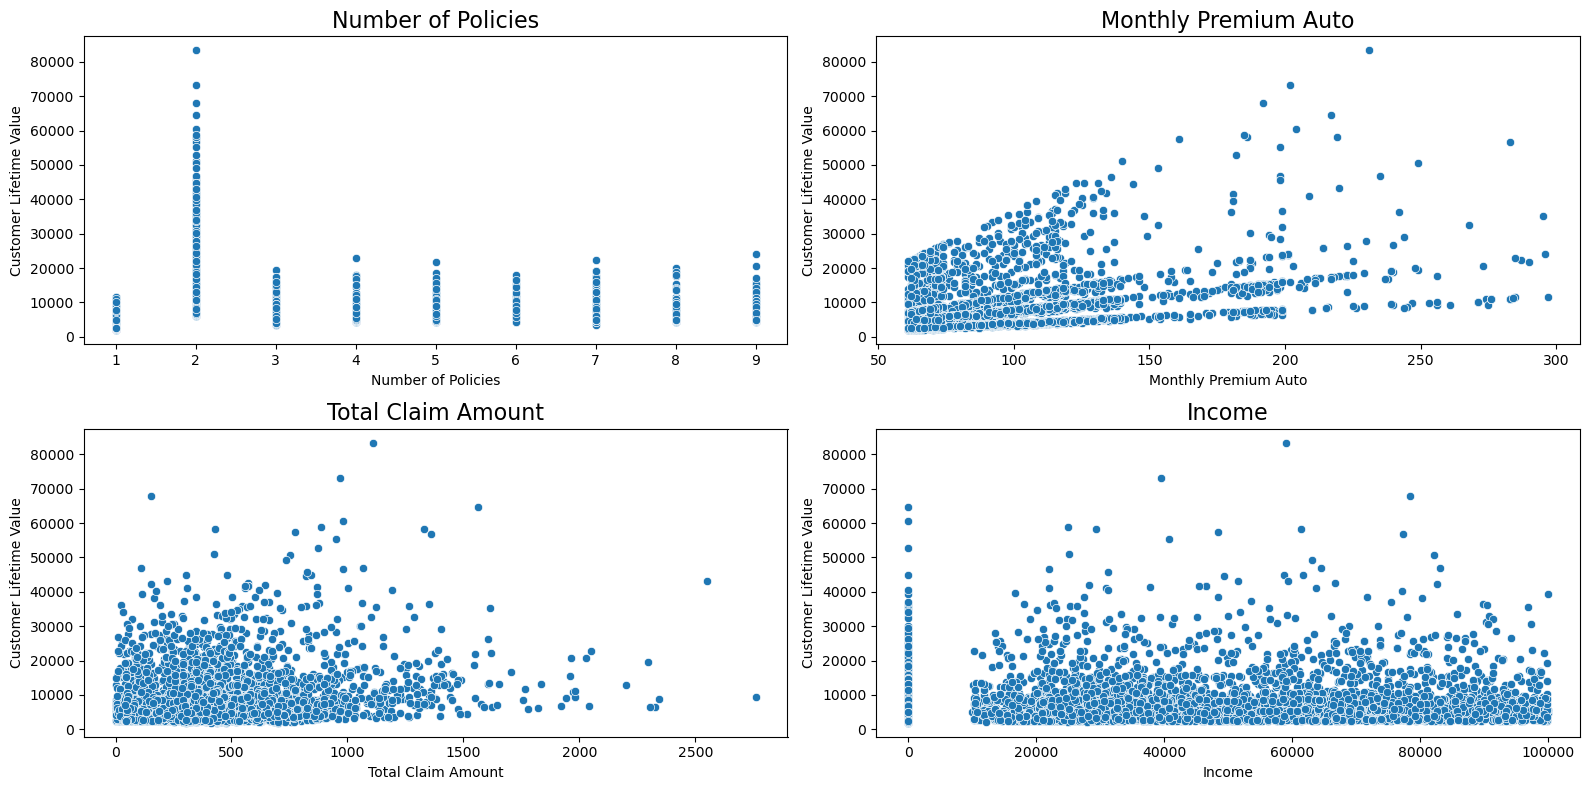

In [7]:
plt.figure(figsize=(16,8))
num_subplot = 1

for i in numerical_columns:
    plt.subplot(2,2,num_subplot)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value')
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

1. **Number of Policies vs Customer Lifetime Value (CLV)**
    - Pelanggan dengan Number of Policies sebanyak 2 polis adalah pelanggan yang lebih berharga dibanding pelanggan dengan jumlah polis lainnya.
    - Number of Policies tidak berbanding lurus dengan CLV.

1. **Monthly Premium Auto vs CLV**
    - Terdapat hubungan positif antara Monthly Premium dan CLV. Premi yang lebih tinggi cenderung menghasilkan nilai CLV yang lebih tinggi.
    - Outlier CLV tinggi masuk akal, karena pelanggan dengan premi tinggi atau klaim signifikan memang cenderung memiliki CLV tinggi.

1. **Total Claim Amount vs CLV**
    - Tidak terlihat hubungan yang jelas antara Total Claim dengan CLV. Nilai klaim besar tidak selalu berkontribusi terhadap CLV yang tinggi.
    - Faktor lain mungkin lebih memengaruhi CLV dibandingkan Total Claim.

1. **Income vs CLV**
    - Income tidak menunjukkan korelasi langsung dengan CLV. Pelanggan dengan Income tinggi maupun rendah dapat memiliki CLV yang tinggi.
    - Ada kluster pelanggan dengan Income rendah tetapi memiliki CLV yang cukup tinggi.


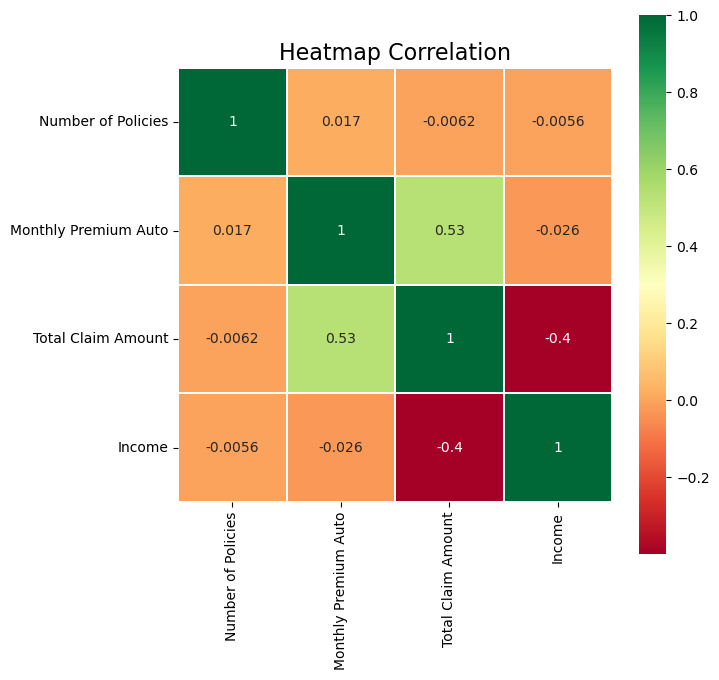

In [8]:
# Menampilkan nilai korelasi antar feature numerical vs target
corr = df[numerical_columns].corr('spearman') # Data tidak terdistribusi normal dan memiliki banyak outlier

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, square=True, cmap='RdYlGn', linewidths=0.05)
plt.title('Heatmap Correlation', size=16);

Heatmap diatas menunjukkan bahwa Customer Lifetime Value memiliki korelasi positif terkuat dengan feature  Number of Policies (0.49). Sedangkan feature Income menjadi feature yang berkorelasi terlemah dengan Customer Lifetime Value (0.053). Selain itu ternyata terdapat sesama feature yang berkorelasi kuat yaitu Monthly Premium Auto dan Total Claim Amount (0.53)

### 3.3. Distribution of Categorical Feature

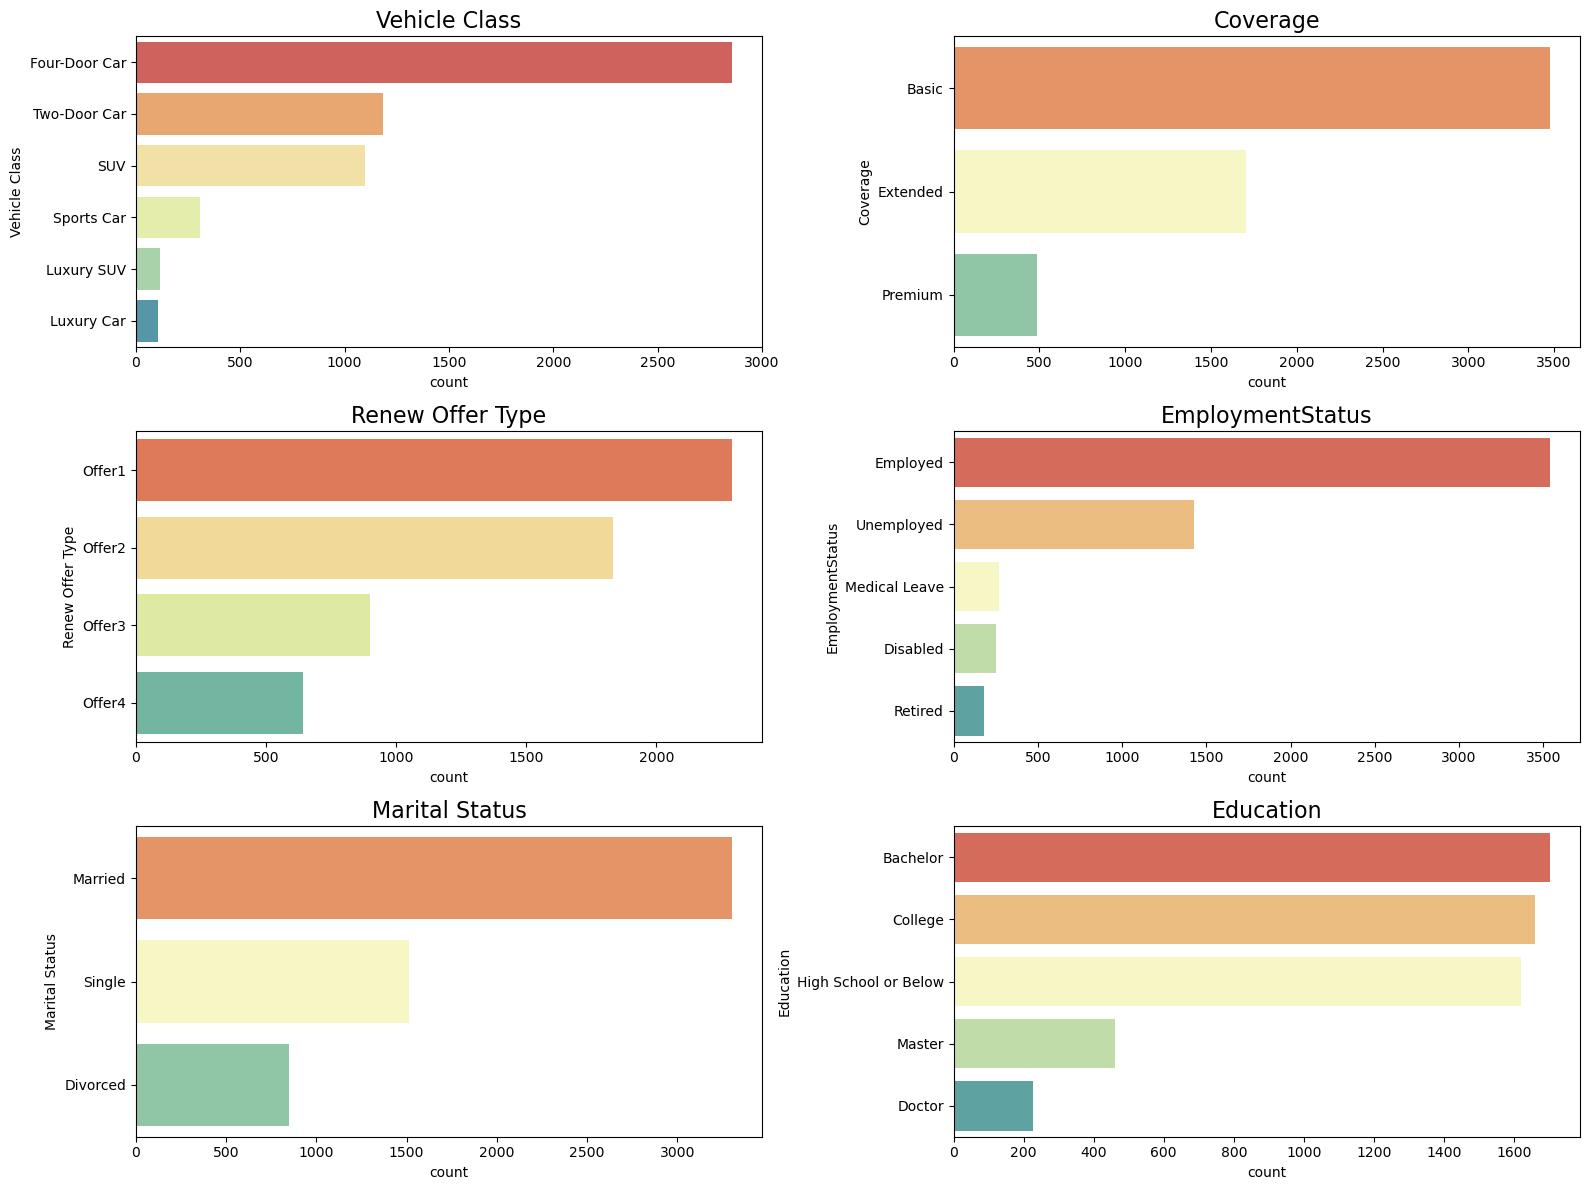

In [9]:
# Filter hanya kolom kategorikal
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(16,12))
num_subplot = 1

for i in categorical_columns:
    plt.subplot(3,2,num_subplot)
    sns.countplot(data=df, y=i, order=df[i].value_counts().index, palette='Spectral')
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

Dari visualisasi data diatas, dapat disimpulkan bahwa profil pelanggan sebagai berikut:
1. **Karakteristik Pelanggan**
    - Mayoritas pelanggan adalah individu yang bekerja (Employed) dan sudah menikah (Married), menunjukkan stabilitas finansial dan kebutuhan akan perlindungan asuransi yang lebih besar.
    - Tingkat pendidikan dominan adalah Sarjana (Bachelor) dan Perguruan Tinggi (College), yang menunjukkan pelanggan dengan latar belakang pendidikan menengah ke atas.

1. **Preferensi Produk**
    - Produk asuransi dengan cakupan Basic lebih diminati, mengindikasikan bahwa pelanggan lebih memilih perlindungan standar dengan harga terjangkau.
    - Offer1 adalah penawaran paling populer, sementara Offer3 dan Offer4 kurang diminati.

1. **Karakteristik Kendaraan**
    - Kelas kendaraan Four-Door Car mendominasi, diikuti oleh Two-Door Car dan SUV, sementara kendaraan mewah seperti Luxury SUV atau Luxury Car hanya mencakup sebagian kecil pasar.

### 3.4. Correlation of Categorical Feature vs Target


<Axes: xlabel='Education', ylabel='Customer Lifetime Value'>

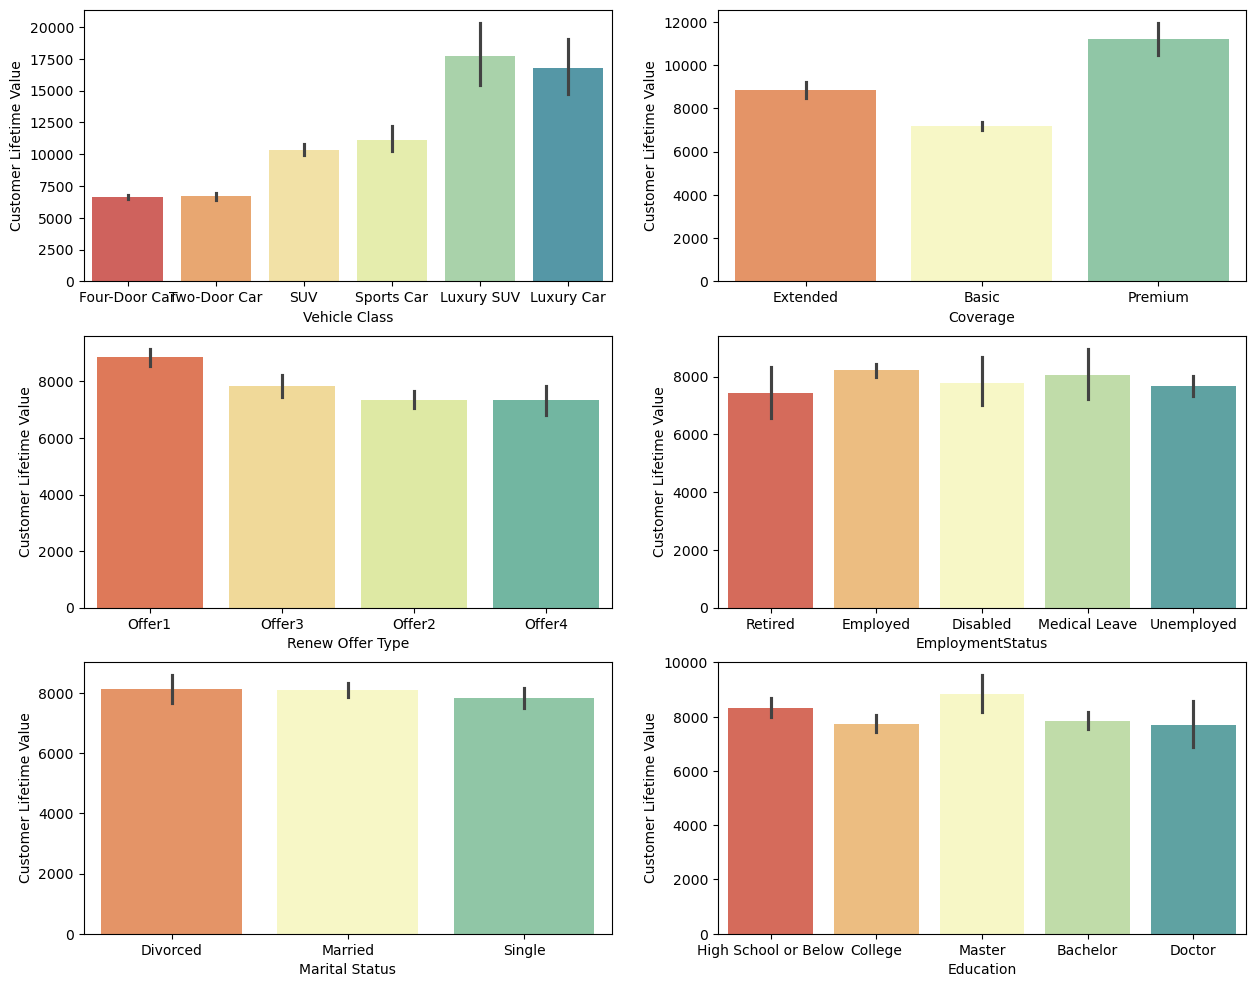

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(15,12))

sns.barplot(x=df['Vehicle Class'], y=df['Customer Lifetime Value'], ax=axes[0,0], palette='Spectral')
sns.barplot(x=df['Coverage'], y=df['Customer Lifetime Value'], ax=axes[0,1], palette='Spectral')
sns.barplot(x=df['Renew Offer Type'], y=df['Customer Lifetime Value'], ax=axes[1,0], palette='Spectral')
sns.barplot(x=df['EmploymentStatus'], y=df['Customer Lifetime Value'], ax=axes[1,1], palette='Spectral')
sns.barplot(x=df['Marital Status'], y=df['Customer Lifetime Value'], ax=axes[2,0], palette='Spectral')
sns.barplot(x=df['Education'], y=df['Customer Lifetime Value'], ax=axes[2,1], palette='Spectral')


- **Vehicle Class vs Customer Lifetime Value (CLV)**  
Pelanggan yang memiliki Luxury SUV dan Luxury Car menunjukkan CLV yang paling tinggi. Hal ini mengindikasikan bahwa segmen pelanggan di kategori ini adalah yang paling bernilai 

- **Coverage vs CLV**  
Premium coverage memberikan kontribusi terbesar pada CLV. Hal ini menunjukkan bahwa cakupan yang lebih lengkap dan mahal menarik pelanggan yang lebih bernilai.

- **Renew Offer Type vs CLV**  
Tipe penawaran Offer1 memberikan hasil CLV tertinggi dibandingkan tipe lain.

- **EmploymentStatus vs CLV**  
Pelanggan yang Retired dan Employed cenderung menghasilkan CLV lebih tinggi, menunjukkan bahwa segmen ini lebih bernilai dibanding pelanggan dengan status pekerjaan lain.

- **Marital Status vs CLV**  
Tidak ada perbedaan signifikan antara pelanggan yang Divorced, Married, dan Single. Segmentasi berbasis status pernikahan tidak terlihat sebagai faktor signifikan untuk CLV.

- **Education vs CLV**  
Pelanggan dengan tingkat pendidikan Master memiliki CLV tertinggi, yang mengindikasikan adanya korelasi positif antara tingkat pendidikan dan nilai pelanggan.

# 4. Data Preprocessing

### 4.1. Missing Value

In [11]:
# Melihat apakah ada missing value pada data set
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Dari pengecekan missing value tidak ditemukan missing value pada data Customer Lifetime Time. Hal ini mungkin dapat terjadi karena data yang dimiliki adalah data internal perusahaan, sehingga dapat dipastikan data customer lengkap.

### 4.2. Duplicated Data

In [12]:
df[df.duplicated()]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


Diketahui terdapat 618 data duplicate pada dataset CLV. Hal ini dapat terjadi mungkin karena terdapat kesalahan pada saat input data. Alasan ini didukung oleh jumlah data duplicate berdasarkan kolom customer lifetime value berjumlah 618 baris. Customer lifetime value nilai bergantung pada masing-masing pelanggan.

In [13]:
# Drop data duplicates
df = df.drop_duplicates()

# Menampilkan jumlah baris dan kolom setelah drop duplicates
print(f'Jumlah baris dataset: {df.shape[0]}\nJumlah kolom dataset: {df.shape[1]}')

Jumlah baris dataset: 5051
Jumlah kolom dataset: 11


Menghapus data duplikat pada analisis machine learning penting untuk memastikan kualitas data yang digunakan dalam pelatihan model, karena duplikasi dapat menyebabkan bias dan overfitting. Selain itu, data duplikat juga meningkatkan kompleksitas komputasi tanpa memberikan informasi tambahan, memperlambat proses pelatihan dan mengurangi efisiensi sistem. Dengan menghapus data duplikat, dataset menjadi lebih bersih, akurat, dan representatif, sehingga model dapat menghasilkan prediksi yang lebih andal.

### 4.3. Outlier

**Menghitung Jumlah Outlier pada Kolom Numerikal**  
Mengidentifikasi dan menghitung jumlah outlier pada setiap kolom numerikal menggunakan metode Inter Quartile Range (IQR).

In [14]:
# Memilih kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Fungsi untuk menghitung outlier menggunakan IQR
def calculate_outliers_iqr(column):
    Q1 = column.quantile(0.25)  # Kuartil pertama
    Q3 = column.quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas
    outliers = ((column < lower_bound) | (column > upper_bound)).sum()
    return outliers

# Menghitung outlier untuk setiap kolom
outlier_CLV = calculate_outliers_iqr(df['Customer Lifetime Value'])
outlier_premi = calculate_outliers_iqr(df['Monthly Premium Auto'])
outlier_claim = calculate_outliers_iqr(df['Total Claim Amount'])
outlier_policy = calculate_outliers_iqr(df['Number of Policies'])

# Menampilkan hasil
print('Jumlah outlier pada Customer Lifetime Value:', outlier_CLV, 'atau sebesar', 
      ((outlier_CLV)/(df.shape[0])*100).round(2), '% dari keseluruhan data')
print('Jumlah outlier pada Monthly Premium Auto:', outlier_premi, 'atau sebesar', 
      ((outlier_premi)/(df.shape[0])*100).round(2), '% dari keseluruhan data')
print('Jumlah outlier pada Total Claim Amount:', outlier_claim, 'atau sebesar', 
      ((outlier_claim)/(df.shape[0])*100).round(2), '% dari keseluruhan data')
print('Jumlah outlier pada Number of Policies:', outlier_policy, 'atau sebesar', 
      ((outlier_policy)/(df.shape[0])*100).round(2), '% dari keseluruhan data')


Jumlah outlier pada Customer Lifetime Value: 449 atau sebesar 8.89 % dari keseluruhan data
Jumlah outlier pada Monthly Premium Auto: 252 atau sebesar 4.99 % dari keseluruhan data
Jumlah outlier pada Total Claim Amount: 217 atau sebesar 4.3 % dari keseluruhan data
Jumlah outlier pada Number of Policies: 228 atau sebesar 4.51 % dari keseluruhan data


Outlier pada fitur Customer Lifetime Value, Monthly Premium Auto, Total Claim Amount, dan Number of Policies mencerminkan natural outliers yang wajar terjadi dalam konteks bisnis asuransi, seperti pelanggan bernilai tinggi, klaim besar akibat kejadian signifikan, atau pelanggan dengan banyak polis. Secara keseluruhan, total outlier berjumlah 1,146 atau 22.69% dari data, yang menunjukkan bahwa proporsi ini cukup signifikan untuk mencerminkan variasi alami dalam data bisnis. Menghapus outlier tersebut berisiko menghilangkan informasi penting yang dapat memberikan wawasan strategis terkait manajemen risiko, segmentasi pelanggan, dan pengembangan produk. Sebaliknya, outlier ini sebaiknya dipertahankan untuk memahami dinamika bisnis yang esensial tanpa mengorbankan representasi data yang realistis.

**Analisis Outlier CLV yang Melebihi Upper Bound**  
Melakukan analisis untuk Outlier pada kolom CLV yang nilainya melebihi Upper Bound. Tujuan dilakukan analisis untuk menentukan apakah Outlier tersebut akan dihapus atau dipertahankan. Analisis dilakukan dengan memvisualisasikan:  
- Outlier CLV dengan Income
- Outlier CLV dengan Total Claim Amount
- Outlier CLV dengan Monthly Premium Auto

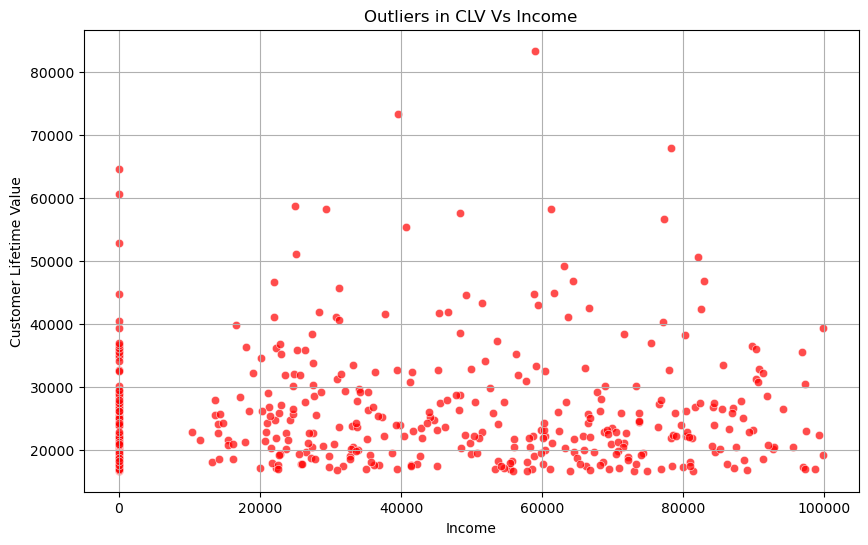

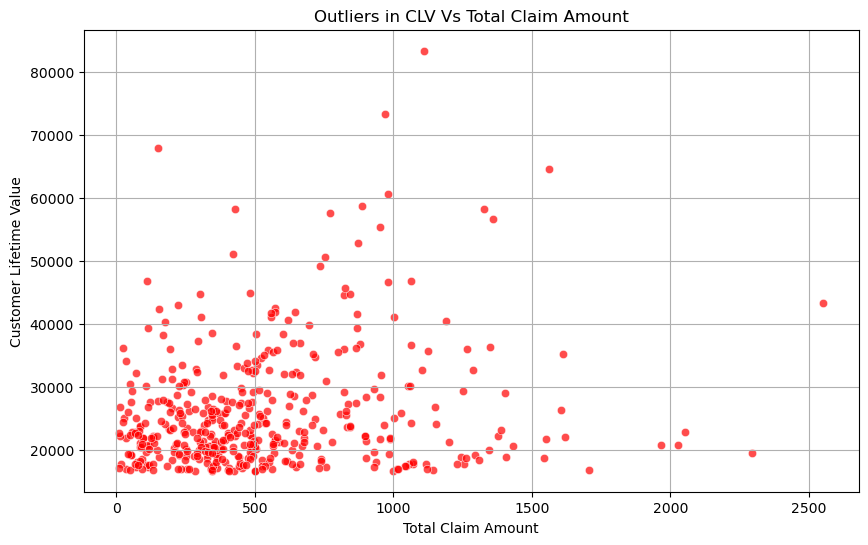

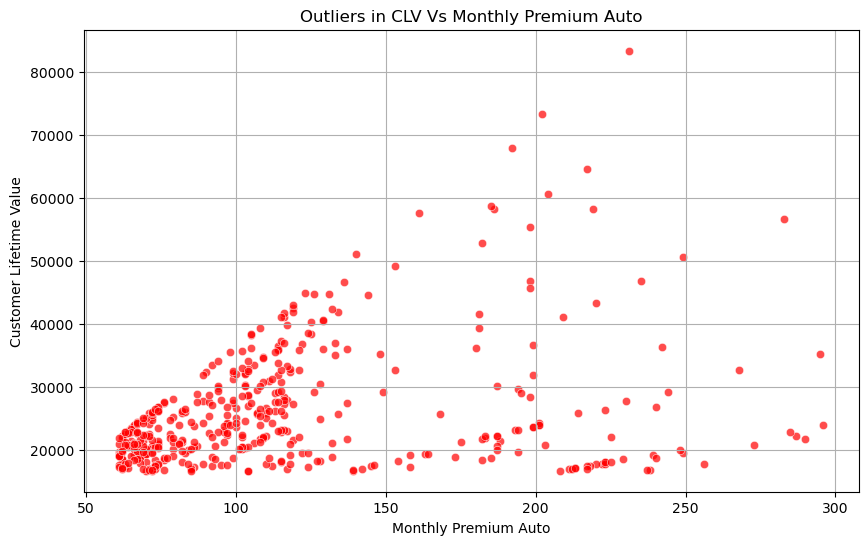

In [15]:
# Fungsi untuk membuat visualisasi hubungan hanya untuk outlier
def visualize_outliers_only(df, outlier_column, related_column, title):
    # Menghitung batas bawah dan atas berdasarkan IQR
    Q1 = df[outlier_column].quantile(0.25)
    Q3 = df[outlier_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring hanya baris yang merupakan outlier
    outliers_df = df[(df[outlier_column] < lower_bound) | (df[outlier_column] > upper_bound)]
    
    # Membuat scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=outliers_df,
        x=related_column,
        y=outlier_column,
        color='red',
        alpha=0.7
    )
    plt.title(title)
    plt.xlabel(related_column)
    plt.ylabel(outlier_column)
    plt.grid(True)
    plt.show()

# Visualisasi hubungan outlier CLV dengan Income
visualize_outliers_only(df, 'Customer Lifetime Value', 'Income', 
                        'Outliers in CLV Vs Income')

# Visualisasi hubungan outlier CLV dengan Total Claim Amount
visualize_outliers_only(df, 'Customer Lifetime Value', 'Total Claim Amount', 
                        'Outliers in CLV Vs Total Claim Amount')

# Visualisasi hubungan outlier CLV dengan Monthly Premium Auto
visualize_outliers_only(df, 'Customer Lifetime Value', 'Monthly Premium Auto', 
                        'Outliers in CLV Vs Monthly Premium Auto')


Secara keseluruhan, nilai CLV yang tinggi dapat dijustifikasi oleh pembayaran premi bulanan yang tinggi dan pengajuan klaim dalam jumlah besar, bahkan jika pelanggan memiliki pendapatan rendah. Hal ini menyoroti segmentasi pelanggan yang memprioritaskan perlindungan maksimal, terlepas dari keterbatasan penghasilan mereka.

**Analisis Outlier yang Melebihi Lower Bound**

In [16]:
def check_outlier_employment_status(df, clv_column='Customer Lifetime Value', income_column='Income', employment_column='EmploymentStatus'):
    # Menghitung IQR untuk CLV
    Q1 = df[clv_column].quantile(0.25)
    Q3 = df[clv_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Memfilter data outlier pada CLV dengan Income = 0
    outliers = df[(df[clv_column] < lower_bound) | (df[clv_column] > upper_bound)]
    outliers_with_zero_income = outliers[outliers[income_column] == 0]
    
    # Mengecek apakah semua memiliki status pekerjaan Unemployed atau Medical Leave
    valid_statuses = ['Unemployed', 'Medical Leave', 'Disabled', 'Retired']
    all_valid = outliers_with_zero_income[employment_column].isin(valid_statuses).all()
    
    return {
        'total_outliers_with_zero_income': len(outliers_with_zero_income),
        'all_valid': all_valid,
        'invalid_records': outliers_with_zero_income[~outliers_with_zero_income[employment_column].isin(valid_statuses)]
    }

# Menggunakan fungsi untuk mengecek status pekerjaan
result = check_outlier_employment_status(df)

# Menampilkan hasil
print('Jumlah outlier pada CLV dengan Income = 0:', result['total_outliers_with_zero_income'])
if result['all_valid']:
    print('Semua outlier pada CLV dengan Income = 0 memiliki status pekerjaan Unemployed, Medical Leave, Disabled, Retired.')
else:
    print('Terdapat outlier pada CLV dengan Income = 0 memiliki status pekerjaan selain Unemployed atau Medical Leave')
    print(result['invalid_records'])


Jumlah outlier pada CLV dengan Income = 0: 114
Semua outlier pada CLV dengan Income = 0 memiliki status pekerjaan Unemployed, Medical Leave, Disabled, Retired.


CLV (Customer Lifetime Value) yang tinggi pada individu dengan penghasilan 0 dan status pekerjaan seperti Unemployed, Medical Leave, Disabled, atau Retired dapat disebabkan oleh beberapa faktor berikut:
- Sumber Penghasilan Tidak Tercatat
- Dukungan dari Pihak Lain
- Loyalitas Tinggi

### 4.5. Encoding
Encoding adalah proses mengubah data kategori menjadi format numerik agar dapat digunakan dalam algoritma machine learning. Pemilihan jenis encoding bergantung pada sifat data kategori. One-hot encoding digunakan ketika kategori tidak memiliki hubungan ordinal atau urutan, sehingga setiap kategori diubah menjadi kolom biner independen. Metode ini mencegah algoritma salah menginterpretasikan hubungan antar kategori. Sementara itu, ordinal encoding cocok untuk data dengan hubungan hierarkis atau urutan yang jelas, karena setiap kategori direpresentasikan dengan angka yang mencerminkan tingkatannya, memudahkan analisis yang mempertimbangkan urutan antar kategori. Berikut pembagian encoder yang digunakan:
- Onehot: Vehicle Class, EmploymentStatus, Renew Offer type, Marital Status
- Ordinal: Coverage, Education

ColumnTransformer akan digunakan untuk menerapkan berbagai jenis transformasi pada kolom-kolom berbeda dalam dataset secara efisien.

In [17]:
# Mapping digunakan untuk ordinal encoder
coverage_mapping = [{"col" : "Coverage",
                   "mapping" : {None : 0, "Basic" : 1,"Extended" : 2, "Premium" : 3}}]
education_mapping = [{"col" : "Education",
                      "mapping" : {None : 0, "High School or Below" : 1,"College" : 2, "Bachelor" : 3, "Master" : 4, "Doctor" : 5}}]

transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first"), ["Vehicle Class", "EmploymentStatus", "Renew Offer Type", "Marital Status"]),
        ("coverage_ordinal", ce.OrdinalEncoder(mapping=coverage_mapping), ["Coverage"]),
        ("education_ordinal", ce.OrdinalEncoder(mapping=education_mapping), ["Education"])
    ],
    remainder="passthrough"
)

# 5. Modelling

### 5.1. Data Splitting

In [18]:
# Define fitur dan target

x = df.drop(['Customer Lifetime Value'], axis=1)
y = df['Customer Lifetime Value']

In [19]:
# Splitting data training + validasi dan test

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=42)

### 5.2. Benchmark Model

In [20]:
# Define algoritma model
linreg = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Kandidat algoritma
models = [linreg, knn, dt, rf, gb, xgb]

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Mencari algoritma terbaik berdasarkan tiap metrics dengan default parameter
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    # R-square
    model_cv_r2 = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='r2'
        )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

[-4040.46187944 -4197.74429616 -3729.27310081 -3652.48872388
 -3886.71664651] LinearRegression()
[-6401.81256606 -7299.90659741 -6088.67111289 -5649.8113421
 -5910.44108153] LinearRegression()
[-0.61592173 -0.56144466 -0.58900952 -0.58726814 -0.60841707] LinearRegression()
[0.15022263 0.19286651 0.18118119 0.1303499  0.18974247] LinearRegression()
[-4838.7211881  -5111.60546119 -4392.05656588 -4392.26802225
 -4675.28656797] KNeighborsRegressor()
[-7268.23556899 -8291.45248349 -7038.67573828 -6505.3917482
 -7031.38672024] KNeighborsRegressor()
[-0.78852539 -0.72658976 -0.699151   -0.72582641 -0.74174519] KNeighborsRegressor()
[-0.09536092 -0.04129071 -0.09427052 -0.15298477 -0.14674078] KNeighborsRegressor()
[-2381.97797179 -2467.64723541 -1995.51512741 -1736.27026957
 -2200.43672588] DecisionTreeRegressor(random_state=42)
[-6203.40880919 -6637.29107307 -5614.21098696 -4779.44408849
 -5840.58682056] DecisionTreeRegressor(random_state=42)
[-0.16921472 -0.16856855 -0.15121767 -0.13770617 

In [21]:
# Evaluasi hasil dari kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'GradientBoosting Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_r2': nilai_mean_r2,
    'Std_r2': nilai_std_r2
})

,Model,Mean_MAE,Std_MAE,Mean_RMSE,Std_RMSE,Mean_MAPE,Std_MAPE,Mean_r2,Std_r2
0,Linear Regression,-3901.336929,199.478431,-6270.128540,570.066456,-0.592412,0.019005,0.168873,0.024473
1,KNN Regressor,-4681.987561,274.655882,-7227.028452,588.083074,-0.736368,0.029466,-0.106130,0.040756
2,DecisionTree Regressor,-2156.369466,265.364815,-5814.988356,622.956013,-0.157165,0.011773,0.285016,0.069143
3,RandomForest Regressor,-1708.122764,214.365777,-4133.687717,550.174376,-0.125093,0.008599,0.640427,0.038206
4,GradientBoosting Regressor,-1784.276391,212.666376,-3921.530525,547.688549,-0.149163,0.008984,0.677377,0.027207
5,XGBoost Regressor,-2189.308391,202.610092,-4419.346881,515.841243,-0.230488,0.007925,0.588430,0.030560


### Analisis Model Terbaik Berdasarkan Tabel Evaluasi

Berdasarkan tabel evaluasi model, pemilihan model terbaik dilakukan dengan mempertimbangkan beberapa metrik performa utama, yaitu **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, **Mean Absolute Percentage Error (MAPE)**, dan **R² (Koefisien Determinasi)**.

- Model dengan nilai **MAE** terendah adalah **RandomForest Regressor (1708.12)**, diikuti oleh **GradientBoosting Regressor (1784.27)**.
- Model dengan nilai **RMSE** terendah adalah **GradientBoosting Regressor (3921.53)**, diikuti oleh **RandomForest Regressor (4133.68)**.
- Model dengan nilai **MAPE** terendah adalah **RandomForest Regressor (0.125)**, diikuti oleh **GradientBoosting Regressor (0.149)**.
- Model dengan nilai **R²** tertinggi adalah **GradientBoosting Regressor (0.677)**, diikuti oleh **RandomForest Regressor (0.640)**.

Kesimpulan:  
**RandomForest Regressor** lebih baik untuk aplikasi yang membutuhkan interpretasi kesalahan absolut yang lebih kecil, sedangkan **GradientBoosting Regressor** lebih cocok untuk aplikasi yang memerlukan analisis pola data yang kompleks dengan penekanan pada variasi data.


### 5.3. Benchmark Model: Predict Test Data
Predict test data dilakukan untuk 2 model benchmark terbaik, yaitu RandomForest Regressor dan GradientBoosting Regressor.


In [22]:
# 2 Benchmark Model terbaik
models = {
    'Gradient Boosting' : GradientBoostingRegressor(random_state=42),
    'Random Forest' : RandomForestRegressor(random_state=42),
    }

score_mae = []
score_rmse = []
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

score_base = pd.DataFrame({'MAE': score_mae, 'RMSE': score_rmse, 'MAPE': score_mape, 'r-square': score_r2}, index=models.keys())
score_base

,MAE,RMSE,MAPE,r-square
Gradient Boosting,1769.490675,4057.872815,0.146451,0.679094
Random Forest,1688.626852,4062.577567,0.128084,0.678349


Berdasarkan hasil evaluasi model Gradient Boosting dan Random Forest Boosting diatas, terdapat potensi untuk meningkatkan performa model dengan mencoba pendekatan lain seperti menambahkan Polynomial Feature.

### 5.4. Polynomial Feature
Dari hasil visualiasi menggunakan scatter plot pada langkah sebelumnya (bab 3.3), fitur polinomial diperlukan untuk variabel seperti Monthly Premium Auto dan Total Claim Amount untuk menangkap hubungan non-linear yang lebih kompleks. Fitur yang ditambahkan:
- Kuadrat Monthly Premium Auto
- Kuadrat Total Claim Amount
- Fitur interkasi: Monthly Premium Auto × Total Claim Amount

In [23]:
# Pilih kolom numerik untuk fitur polinomial
numeric_columns = ['Monthly Premium Auto', 'Total Claim Amount']
selected_data = df[numeric_columns]

# Terapkan Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(selected_data)

# Konversi fitur polinomial menjadi DataFrame
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numeric_columns))

# Gabungkan DataFrame dengan fitur polinomial tanpa duplikasi
df = df.drop(columns=numeric_columns)  # Hapus kolom asli yang digunakan
df_poly = pd.concat([df.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)
df_poly

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Income,Customer Lifetime Value,Monthly Premium Auto,Total Claim Amount,Monthly Premium Auto^2,Monthly Premium Auto Total Claim Amount,Total Claim Amount^2
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,11828.0,10083.486880,90.0,571.479602,8100.0,51433.164180,326588.935502
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,44762.0,4943.386117,62.0,114.514440,3844.0,7099.895280,13113.556969
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,21514.0,11981.984810,62.0,257.248789,3844.0,15949.424918,66176.939442
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,17913.0,4550.856045,116.0,556.800000,13456.0,64588.800000,310026.240000
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,19030.0,2372.155492,62.0,355.820799,3844.0,22060.889538,126608.441001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2.0,30595.0,8114.409136,69.0,446.084760,4761.0,30779.848440,198991.613104
5047,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,0.0,2442.216651,74.0,532.800000,5476.0,39427.200000,283875.840000
5048,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,27778.0,12904.943360,109.0,523.200000,11881.0,57028.800000,273738.240000
5049,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,84658.0,2447.053134,62.0,44.780402,3844.0,2776.384924,2005.284403


### 5.5. Benchmark Model with Polynomial Feature

In [24]:
# Define fitur dan target

xp = df_poly.drop(['Customer Lifetime Value'], axis=1)
yp = df_poly['Customer Lifetime Value']

# Splitting data training + validasi dan test

xp_train, xp_test, yp_train, yp_test = train_test_split(
    xp,
    yp,
    test_size=0.25,
    random_state=42)

In [25]:
# Define algoritma model
linreg = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Kandidat algoritma
models = [linreg, knn, dt, rf, gb, xgb]

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Mencari algoritma terbaik berdasarkan tiap metrics dengan default parameter
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        xp_train, 
        yp_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        xp_train, 
        yp_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        xp_train, 
        yp_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    # R-square
    model_cv_r2 = cross_val_score(
        estimator, 
        xp_train, 
        yp_train, 
        cv=crossval, 
        scoring='r2'
        )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

[-4041.50982704 -4221.13533298 -3734.20890819 -3647.85733796
 -3887.0325677 ] LinearRegression()
[-6435.69726273 -7321.22648072 -6104.3420735  -5645.84058225
 -5912.54238715] LinearRegression()
[-0.61753333 -0.56664241 -0.59007316 -0.58965004 -0.6093847 ] LinearRegression()
[0.14120311 0.18814505 0.17696083 0.13157187 0.18916624] LinearRegression()
[-4638.35133382 -4646.59734876 -4130.11064522 -4329.98066606
 -4397.67763785] KNeighborsRegressor()
[-7136.03267708 -7758.46152825 -6583.36746542 -6465.28334948
 -6531.19213825] KNeighborsRegressor()
[-0.69548418 -0.63865806 -0.65248508 -0.69908326 -0.68634966] KNeighborsRegressor()
[-0.05587599  0.08827895  0.04272002 -0.13881135  0.01060842] KNeighborsRegressor()
[-2239.13522257 -2267.36379637 -1949.69950575 -1938.03733966
 -2041.37446254] DecisionTreeRegressor(random_state=42)
[-5932.94909565 -5995.96123814 -5528.29633359 -5362.2619679
 -5483.25165719] DecisionTreeRegressor(random_state=42)
[-0.15865551 -0.1527337  -0.15050815 -0.15406591

In [26]:
# Evaluasi hasil dari kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'GradientBoosting Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_r2': nilai_mean_r2,
    'Std_r2': nilai_std_r2
})

,Model,Mean_MAE,Std_MAE,Mean_RMSE,Std_RMSE,Mean_MAPE,Std_MAPE,Mean_r2,Std_r2
0,Linear Regression,-3906.348795,206.969640,-6283.929757,579.026075,-0.594657,0.017726,0.165409,0.024272
1,KNN Regressor,-4428.543526,195.599750,-6894.867432,493.515931,-0.674412,0.024308,-0.010616,0.079445
2,DecisionTree Regressor,-2087.122065,140.569655,-5660.544058,254.795389,-0.153309,0.002993,0.313964,0.079583
3,RandomForest Regressor,-1694.920014,210.746702,-4103.023852,571.460774,-0.124587,0.008314,0.645997,0.040120
4,GradientBoosting Regressor,-1779.924337,221.496516,-3912.593493,554.894216,-0.148271,0.010591,0.678909,0.028227
5,XGBoost Regressor,-2169.850361,195.312166,-4344.979427,536.387104,-0.232584,0.008381,0.602939,0.025470


### 5.6. Benchmark Model with Polynomial Feature: Predict Test Data

In [27]:
# 2 Benchmark Model terbaik
models = {
    'Gradient Boosting' : GradientBoostingRegressor(random_state=42),
    'Random Forest' : RandomForestRegressor(random_state=42),
    }

score_mae = []
score_rmse = []
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(xp_train, yp_train)
    yp_pred = model.predict(xp_test)
    score_mae.append(mean_absolute_error(yp_test, yp_pred))
    score_rmse.append(np.sqrt(mean_squared_error(yp_test, yp_pred)))
    score_mape.append(mean_absolute_percentage_error(yp_test, yp_pred))
    score_r2.append(r2_score(yp_test, yp_pred))

score_poly = pd.DataFrame({'MAE': score_mae, 'RMSE': score_rmse, 'MAPE': score_mape, 'r-square': score_r2}, index=models.keys())
score_poly

,MAE,RMSE,MAPE,r-square
Gradient Boosting,1767.353417,4070.143874,0.144358,0.677150
Random Forest,1664.644837,4046.403658,0.126481,0.680905


### 5.7. Comparison Model with Base Feature and Polynomial Feature

**Predict Test Data with Base Feature**  
![Screen Shot 2024-11-21 at 14.41.25.png](<attachment:Screen Shot 2024-11-21 at 14.41.25.png>)
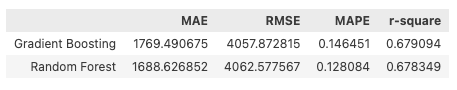

**Predict Test Data with Polynomial Feature**  
![Screen Shot 2024-11-21 at 14.42.11.png](<attachment:Screen Shot 2024-11-21 at 14.42.11.png>)
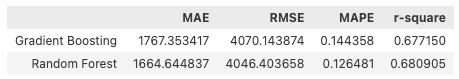

### Pilihan Model Terbaik:
**Random Forest Regressor** dengan **Polynomial Feature** adalah model terbaik karena:

1. **MAE paling rendah (1664.64)**: menunjukkan prediksi lebih akurat.
2. **RMSE paling rendah (4046.40)**: menunjukkan kesalahan lebih kecil pada data outlier.
3. **MAPE paling rendah (0.126)**: memberikan error yang proporsional terhadap skala data.
4. **R-squared tertinggi (0.681)**: menunjukkan bahwa model ini menjelaskan variasi data lebih baik dibandingkan model lain.


### 5.8. Random Forest Regressor
Random Forest Regressor adalah salah satu metode dalam machine learning yang termasuk dalam algoritma ensemble. Random Forest menggunakan pendekatan bagging (Bootstrap Aggregating) untuk menggabungkan prediksi dari beberapa model pohon keputusan (decision trees) yang berbeda, sehingga menghasilkan prediksi yang lebih akurat dan stabil.

Cara Kerja Random Forest Regressor:
- **Pembuatan Dataset Bootstrapped**  
Dataset test dibagi secara acak menjadi beberapa subset menggunakan metode bootstrapping. Ini berarti beberapa data dapat muncul lebih dari sekali dalam satu subset, sementara yang lainnya tidak muncul. 

- **Pelatihan Pohon Keputusan**   
Pada setiap subset yang telah di-bootstrap, model decision tree dibangun. Untuk setiap pohon, hanya sejumlah fitur tertentu yang dipilih secara acak sebagai kandidat untuk splitting. Hal ini membantu mengurangi korelasi antara pohon-pohon.  

- **Prediksi Tiap Pohon**  
Ketika sebuah input data baru diberikan, setiap pohon keputusan akan memberikan prediksinya sendiri berdasarkan pola yang telah dipelajari.  

- **Averaging (Pengambilan Rata-Rata)**  
Untuk kasus regresi, hasil dari semua pohon akan dirata-ratakan untuk menghasilkan prediksi akhir (final prediction).

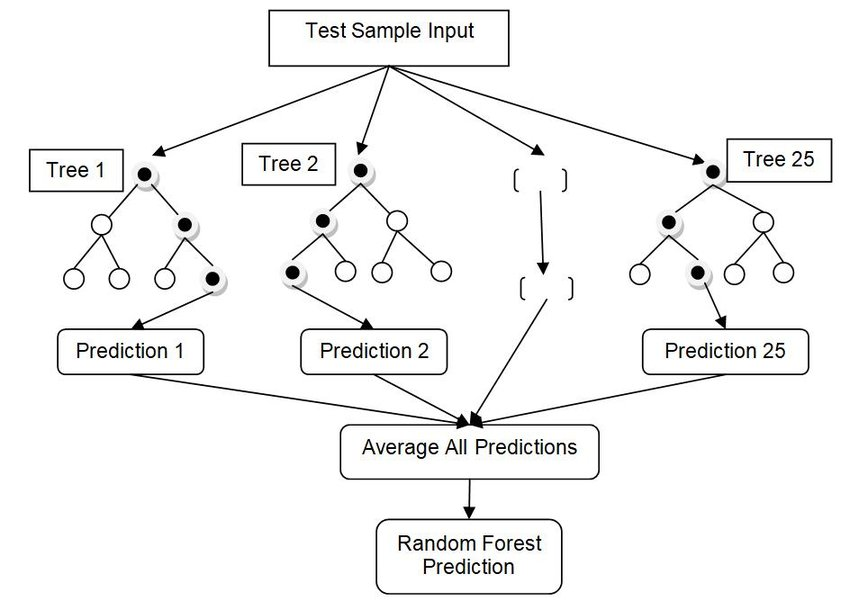

### 5.9. Hyperparameter Tuning  
Hyperparameter Tuning menggunakan metode Random Search. 

In [28]:
# Kedalaman pohon
max_depth = list(np.arange(1, 21))  # Lebih fleksibel untuk RandomForest

# Jumlah pohon
n_estimators = list(np.arange(50, 201, 10))  # RandomForest sering memiliki lebih banyak pohon

# Jumlah feature yang digunakan untuk tiap split
max_features = ['sqrt', 'log2', None]  # Pilihan umum: akar kuadrat, log2, atau semua fitur

# Jumlah minimum sampel untuk split
min_samples_split = list(np.arange(2, 11))  # Minimum sampel untuk memisahkan node

# Jumlah minimum sampel untuk leaf
min_samples_leaf = list(np.arange(1, 11))  # Minimum sampel dalam leaf

# Jumlah baris yang digunakan untuk tiap pohon (% dari total baris train set)
max_samples = list(np.arange(2, 10)/10)  # Hanya jika ingin menggunakan bagging fraction

# Hyperparam space RandomForestRegressor
hyperparam_space_rf = {
    'model__n_estimators': n_estimators,
    'model__max_depth': max_depth,
    'model__max_features': max_features,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__max_samples': max_samples
}


In [29]:
# Membuat algorithm chains
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('model', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    cv = crossval,
    n_iter= 200,
    scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error', 'r2'],
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    n_jobs = -1,
    random_state=42
)

In [30]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(xp_train, yp_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('coverage_ordinal',
                                                                               OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                        'dat...
                                                               0.8, 0.9],
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                                        'model__n_estimators': [50, 60, 70, 80,
                                                                90, 100, 110,
                                                                120, 130, 140,
                                                                150, 160, 170,
                                                                180, 190,
                                                                200]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_root_mean_squared_error',
                            'neg_mean_absolute_percentage_error', 'r2'])

In [31]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAE, RMSE & r-square
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_percentage_error', 'rank_test_r2']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_samples,param_model__max_features,param_model__max_depth,...,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
98,1.910111,0.016799,0.055426,0.001710,110,7,4,0.4,None,9,...,0.008314,1,0.671615,0.667553,0.658586,0.730875,0.696901,0.685106,0.026182,3
176,2.247769,0.010456,0.055977,0.003247,130,10,3,0.4,None,17,...,0.008273,3,0.669277,0.669047,0.657224,0.731577,0.693696,0.684164,0.026513,8
58,1.395903,0.003175,0.044390,0.002688,80,8,4,0.4,None,19,...,0.008721,2,0.669623,0.664404,0.658779,0.730180,0.690448,0.682687,0.026047,25
129,2.194726,0.010225,0.071594,0.002672,180,5,2,0.2,None,14,...,0.007201,19,0.677542,0.672117,0.658341,0.721598,0.692952,0.684510,0.021604,5
103,2.043412,0.019722,0.056313,0.002149,120,7,5,0.4,None,19,...,0.008492,9,0.669072,0.669447,0.658129,0.729111,0.695599,0.684272,0.025586,7


In [32]:
# Cek skor dan params terbaik
print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: -3863.5555222229877
Best_params: {'model__n_estimators': 80, 'model__min_samples_split': 3, 'model__min_samples_leaf': 6, 'model__max_samples': 0.4, 'model__max_features': None, 'model__max_depth': 5}


### 5.10. Tuned Model Performance

In [33]:
# Model GradientBoosting
model = {'Random Forest': RandomForestRegressor(random_state=42)}

# Define model terhadap estimator terbaik
rf_tuned = random_rf.best_estimator_

# Fitting model
rf_tuned.fit(xp_train, yp_train)

# Predict validation set
yp_pred_rf_tuning = rf_tuned.predict(xp_test)

# Simpan nilai metrics MAE, RMSE & r2 setelah tuning
mae_rf_tuning = mean_absolute_error(yp_test, yp_pred_rf_tuning)
rmse_rf_tuning = np.sqrt(mean_squared_error(yp_test, yp_pred_rf_tuning))
mape_rf_tuning = mean_absolute_percentage_error(yp_test, yp_pred_rf_tuning)
r2_rf_tuning = r2_score(yp_test, yp_pred_rf_tuning)

score_tuned_model = pd.DataFrame({'MAE': mae_rf_tuning, 'RMSE': rmse_rf_tuning, 'MAPE': mape_rf_tuning, 'r-square': r2_rf_tuning}, index=model.keys())
score_tuned_model

,MAE,RMSE,MAPE,r-square
Random Forest,1731.560318,3949.777948,0.136737,0.695963


### 5.11. Performance Comparison in Test Data  

Perbandingan performa model sebelum dan sesudah hyperparameter tuning pada test data.

In [34]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_poly.loc['Random Forest']).T

,MAE,RMSE,MAPE,r-square
Random Forest,1664.644837,4046.403658,0.126481,0.680905


In [35]:
# Setelah hyperparameter tuning
rf_tuned = random_rf.best_estimator_

# Fitting model
rf_tuned.fit(xp_train, yp_train)

# Predict test set
yp_pred_rf_test = rf_tuned.predict(xp_test)

mae_rf_after = mean_absolute_error(yp_test, yp_pred_rf_test)
rmse_rf_after = np.sqrt(mean_squared_error(yp_test, yp_pred_rf_test))
mape_rf_after = mean_absolute_percentage_error(yp_test, yp_pred_rf_test)
r2_rf_after = r2_score(y_test, yp_pred_rf_test)

score_after_tuning = pd.DataFrame({'MAE': mae_rf_after, 'RMSE': rmse_rf_after, 'MAPE': mape_rf_after, 'r-square': r2_rf_after}, index=model.keys())
score_after_tuning

,MAE,RMSE,MAPE,r-square
Random Forest,1731.560318,3949.777948,0.136737,0.695963


### Perbandingan Model (Tanpa Tuning vs Dengan Tuning)

**Tabel Perbandingan**
| Metrik   | Model Tanpa Tuning | Model Dengan Tuning |
|----------|--------------------|---------------------|
| MAE      | 1664.64            | 1731.56             | 
| RMSE     | 4046.40            | 3949.77             | 
| MAPE     | 0.126              | 0.137               | 
| R-square | 0.681              | 0.696               | 

1. **MAE (Mean Absolute Error)**:
   - Model tanpa tuning memiliki MAE sebesar **1664.64**, sementara model dengan tuning meningkat menjadi **1731.56**.
   - Meskipun ada sedikit peningkatan error absolut setelah tuning, tuning lebih fokus pada optimasi keseluruhan model daripada hanya meminimalkan error absolut.

2. **RMSE (Root Mean Square Error)**:
   - Model tanpa tuning memiliki RMSE sebesar **4046.40**, sedangkan model dengan tuning menurun menjadi **3949.77**.
   - Penurunan RMSE setelah tuning menunjukkan tuning berhasil mengurangi error besar yang berdampak signifikan pada performa model.

3. **MAPE (Mean Absolute Percentage Error)**:
   - Model tanpa tuning memiliki MAPE sebesar **0.126**, sedangkan model dengan tuning meningkat menjadi **0.137**.
   - Peningkatan tingkat kesalahan persentase rata-rata setelah tuning menunjukkan trade-off antara generalisasi model dan pengurangan error spesifik tertentu.

4. **R-square**:
   - Model tanpa tuning memiliki \( R^2 \) sebesar **0.681**, sedangkan model dengan tuning meningkat menjadi **0.696**.
   - Peningkatan \( R^2 \) menunjukkan model hasil tuning dapat menjelaskan variansi data dengan lebih baik, memberikan hasil yang lebih stabil dan konsisten.

**Insight**
- **Tuning model memberikan peningkatan pada beberapa aspek penting, terutama dalam RMSE dan \( R^2 \), yang merupakan indikator performa keseluruhan model.**
- Namun, terdapat trade-off dalam MAE dan MAPE yang sedikit meningkat setelah tuning, mengindikasikan tuning model lebih mengoptimalkan pengurangan error besar.
- Model hasil tuning lebih cocok untuk aplikasi yang memerlukan prediksi stabil dan konsisten, meskipun ada sedikit peningkatan error pada skala kecil.


## 

# 6. Kesimpulan
Setelah menemukan model terbaik, yaitu Random Forest Regressor dengan menggunakan tuning, langkah selanjutnya adalah melakukan analisis pada model yang dipilih. Analisis lanjutan dilakukan untuk mengevaluasi performa model secara komprehensif serta mengidentifikasi kekuatan dan kelemahan dari prediksi yang dihasilkan. Langkah-langkah ini bertujuan untuk memastikan bahwa model yang digunakan tidak hanya memberikan akurasi yang baik, tetapi juga memahami bagaimana model bekerja dan bagaimana hasilnya dapat diinterpretasikan.

Analisis yang dilakukan meliputi:
- Residual Distribution
- Learning Curve
- Residual Analysis

### 6.1. Residual Distribution
Residual adalah selisih antara nilai aktual dan nilai yang diprediksi oleh model. Dalam konteks analisis regresi, residual menunjukkan sejauh mana model berhasil memprediksi data. Residual dapat digunakan untuk mengevaluasi performa model

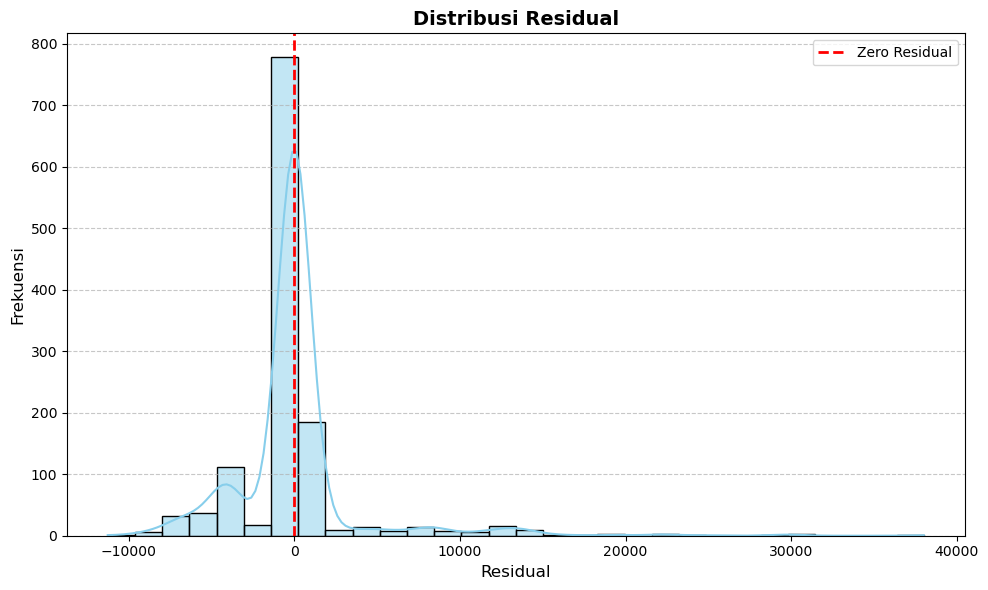

In [36]:
# Menghitung residual
residual = yp_test - yp_pred_rf_test

plt.figure(figsize=(10, 6))  # Mengatur ukuran figure
sns.histplot(residual, bins=30, kde=True, color='skyblue', edgecolor='black')  # Membuat histogram dengan KDE
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')  # Garis vertikal untuk nol residual
plt.xlabel("Residual", fontsize=12)  # Label sumbu X
plt.ylabel("Frekuensi", fontsize=12)  # Label sumbu Y
plt.title("Distribusi Residual", fontsize=14, fontweight='bold')  # Judul yang lebih informatif
plt.legend(fontsize=10)  # Menambahkan legenda
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid horizontal
plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()

### **Insight**  
Dari hasil visualisasi histogram diatas, didapatkan insight untuk distribusi residual sebagai berikut:

- **Normalitas Residual**  
Distribusi residual menunjukkan bahwa mayoritas nilai residual mendekati nol, yang merupakan indikasi bahwa model prediktif yang digunakan cukup baik dalam memprediksi nilai aktual. Ada sedikit skew positif karena terdapat nilai residual yang lebih tinggi di sisi positif.

- **Mean Residual yang Mendekati Nol**  
Garis putus-putus merah pada nol menunjukkan bahwa rata-rata residual berada di sekitar nol, yang merupakan indikasi baik bahwa model tidak memiliki bias sistematis.

- **Identifikasi Outlier**  
Outlier terlihat di kedua sisi distribusi, terutama pada sisi kanan dengan nilai residual positif yang cukup tinggi. Hal ini menunjukkan bahwa terdapat beberapa pengamatan yang jauh dari rata-rata residual.  

Diperlukan analisis lebih lanjut terhadap data dengan nilai residual ekstrem untuk mengidentifikasi faktor penyebabnya.

### 6.2. Learning Curve
Learning curve adalah grafik yang digunakan untuk mengevaluasi performa model berdasarkan akurasi atau error terhadap ukuran data yang digunakan selama pelatihan. Grafik ini memberikan wawasan tentang bagaimana model belajar seiring dengan bertambahnya jumlah data, dan membantu mengidentifikasi potensi masalah seperti overfitting atau underfitting.

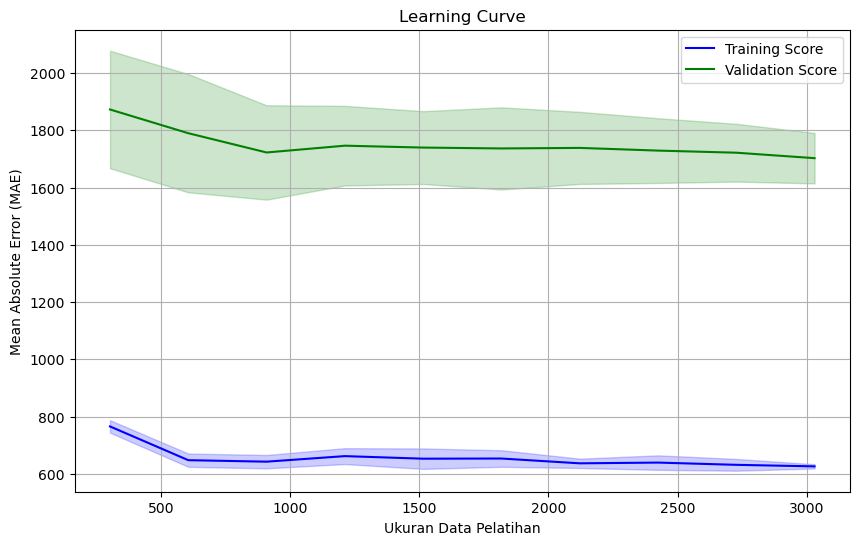

In [37]:
estimator = Pipeline([
    ('preprocessing', transformer),  
    ('model', RandomForestRegressor())  
])

# Menghitung Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator,
    xp_train,
    yp_train,
    cv=5,
    scoring='neg_mean_absolute_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Mean dan standard deviation dari train scores
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

# Mean dan standard deviation dari test scores
test_mean = -test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Visualisasikan Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Ukuran Data Pelatihan')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### **Insight**  
Berdasarkan hasil visualisasi learning curve di atas, didapatkan insight sebagai berikut:  

- **Mean Absolute Error (MAE)**  
Training Score memiliki MAE yang lebih rendah dibandingkan dengan Validation Score di seluruh ukuran data pelatihan. Hal ini menunjukkan bahwa model mempelajari data pelatihan dengan baik, namun belum dapat generalisasi secara sempurna pada data validasi.
MAE pada Validation Score terlihat lebih tinggi dibandingkan Training Score, yang mengindikasikan adanya **overfitting**.

- **Stabilitas Training Score**  
MAE pada Training Score tetap stabil seiring bertambahnya ukuran data pelatihan, menunjukkan bahwa model telah mempelajari data pelatihan dengan sangat baik.

- **Validation Score**  
MAE pada Validation Score menurun seiring bertambahnya ukuran data pelatihan, namun masih berada di kisaran yang lebih tinggi dibandingkan dengan Training Score. Ini menandakan bahwa menambah data pelatihan sedikit membantu mengurangi kesalahan pada validasi.

- **Variansi Validation Score**  
Rentang (area hijau) menunjukkan variabilitas hasil validasi. Di awal (ukuran data kecil), rentang ini lebih besar, menandakan performa model lebih tidak stabil pada data validasi. Namun, rentang ini menyempit seiring bertambahnya ukuran data pelatihan

### 6.3. Residual Analysist  
Residual analysis memiliki tujuan utama untuk memeriksa kesesuaian model terhadap data, termasuk mendeteksi residual ekstrem.

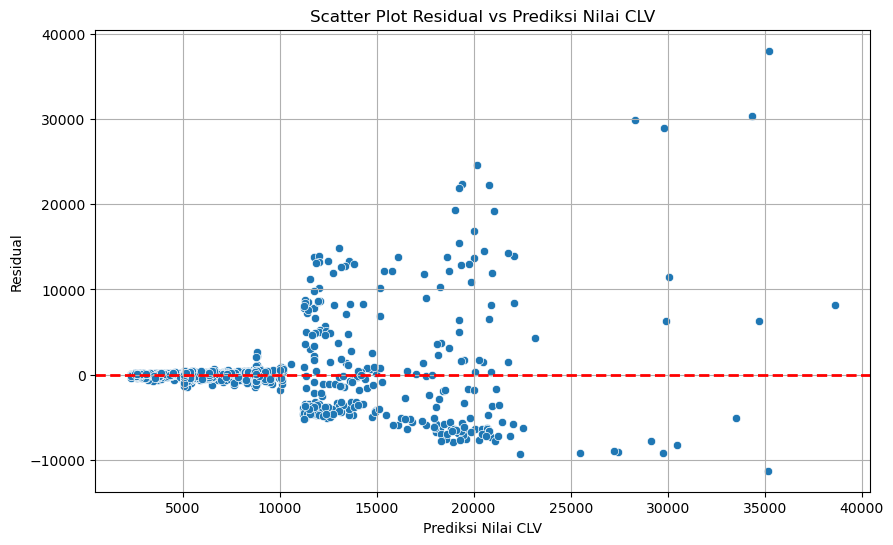

In [38]:
# Membuat scatter plot Residual vs Prediksi CLV
plt.figure(figsize=(10, 6))
sns.scatterplot(x=yp_pred_rf_test, y=residual)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Scatter Plot Residual vs Prediksi Nilai CLV')
plt.xlabel('Prediksi Nilai CLV')
plt.ylabel('Residual')
plt.grid()
plt.show()

**Membuat DataFrame Residual**

In [39]:
dataframe = pd.DataFrame({
    'Actual': yp_test, 
    'Predicted': yp_pred_rf_tuning
})

dataframe['Residual'] = dataframe['Actual'] - dataframe['Predicted']
dataframe.sort_index()

,Actual,Predicted,Residual
8,5243.828046,5079.262796,164.565250
12,2248.449633,2439.130661,-190.681028
17,4711.845199,4965.428640,-253.583441
19,2813.506170,2764.038100,49.468070
23,5420.361822,5372.811477,47.550345
...,...,...,...
5035,4502.867562,4965.428640,-462.561078
5039,2601.810999,2512.606280,89.204719
5041,7786.676381,7342.333843,444.342538
5047,2442.216651,2694.579366,-252.362715


**Menggabungkan DataFrame Residual dengan DataFrame Awal**

In [40]:
result = df_poly.join(dataframe, how='outer')  # Menggabungkan DataFrame
filtered_result = result[result['Actual'].notna()]  # Memfilter baris dengan nilai 'Actual' yang bukan NaN
filtered_result

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Income,Customer Lifetime Value,Monthly Premium Auto,Total Claim Amount,Monthly Premium Auto^2,Monthly Premium Auto Total Claim Amount,Total Claim Amount^2,Actual,Predicted,Residual
8,Four-Door Car,Basic,Offer2,Employed,Married,Bachelor,5.0,36615.0,5243.828046,65.0,264.563772,4225.0,17196.645180,6.999399e+04,5243.828046,5079.262796,164.565250
12,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,24910.0,2248.449633,63.0,347.857619,3969.0,21915.029997,1.210049e+05,2248.449633,2439.130661,-190.681028
17,SUV,Extended,Offer1,Unemployed,Single,College,1.0,0.0,4711.845199,129.0,1178.950186,16641.0,152084.573994,1.389924e+06,4711.845199,4965.428640,-253.583441
19,Four-Door Car,Basic,Offer2,Employed,Married,Doctor,1.0,50397.0,2813.506170,70.0,350.650080,4900.0,24545.505600,1.229555e+05,2813.506170,2764.038100,49.468070
23,Four-Door Car,Basic,Offer2,Employed,Single,College,4.0,31614.0,5420.361822,71.0,234.683628,5041.0,16662.537588,5.507641e+04,5420.361822,5372.811477,47.550345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,SUV,Extended,Offer1,Unemployed,Single,High School or Below,1.0,0.0,4502.867562,129.0,1486.410662,16641.0,191746.975398,2.209417e+06,4502.867562,4965.428640,-462.561078
5039,Four-Door Car,Basic,Offer2,Employed,Married,High School or Below,1.0,57231.0,2601.810999,65.0,305.117221,4225.0,19832.619365,9.309652e+04,2601.810999,2512.606280,89.204719
5041,Four-Door Car,Extended,Offer1,Employed,Married,College,6.0,83000.0,7786.676381,97.0,378.556600,9409.0,36719.990200,1.433051e+05,7786.676381,7342.333843,444.342538
5047,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,0.0,2442.216651,74.0,532.800000,5476.0,39427.200000,2.838758e+05,2442.216651,2694.579366,-252.362715


**Filtering untuk Residual Ekstrem**  
Residual Ektrem adalah nilai residual yang sangat besar atau jauh dari zero line dibandingkan dengan mayoritas residual lainnya. Asumsi untuk batas ekstrem atas ditentukan 10000 dan batas ektrem bawah ditentukan -10000.

In [41]:
extreme_values = filtered_result[(filtered_result['Residual'] > 10000) | (filtered_result['Residual'] < -10000)].sort_values(by='Residual', ascending=False)
extreme_values

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Income,Customer Lifetime Value,Monthly Premium Auto,Total Claim Amount,Monthly Premium Auto^2,Monthly Premium Auto Total Claim Amount,Total Claim Amount^2,Actual,Predicted,Residual
1261,Luxury SUV,Extended,Offer1,Employed,Married,Bachelor,2.0,39547.0,73225.95652,202.0,969.600000,40804.0,195859.200000,9.401242e+05,73225.95652,35211.864790,38014.091730
828,Luxury Car,Extended,Offer1,Unemployed,Married,High School or Below,2.0,0.0,64618.75715,217.0,1562.400000,47089.0,339040.800000,2.441094e+06,64618.75715,34322.437448,30296.319702
3904,Luxury Car,Basic,Offer2,Employed,Single,Bachelor,2.0,61321.0,58166.55351,186.0,427.631210,34596.0,79539.405060,1.828685e+05,58166.55351,28290.372635,29876.180875
4418,SUV,Premium,Offer2,Employed,Married,Bachelor,2.0,24964.0,58753.88046,185.0,888.000000,34225.0,164280.000000,7.885440e+05,58753.88046,29801.554193,28952.326267
4458,SUV,Extended,Offer1,Employed,Married,College,2.0,58778.0,44795.46942,126.0,302.033971,15876.0,38056.280346,9.122452e+04,44795.46942,20186.274581,24609.194839
3787,Four-Door Car,Premium,Offer2,Employed,Married,College,2.0,45431.0,41745.00646,116.0,556.800000,13456.0,64588.800000,3.100262e+05,41745.00646,19395.962158,22349.044302
4986,SUV,Basic,Offer2,Employed,Married,Master,2.0,59349.0,43026.52149,119.0,222.032326,14161.0,26421.846794,4.929835e+04,43026.52149,20804.328930,22222.192560
3000,Four-Door Car,Premium,Offer1,Employed,Married,College,2.0,30845.0,41103.24183,116.0,556.800000,13456.0,64588.800000,3.100262e+05,41103.24183,19225.996623,21877.245207
2602,SUV,Basic,Offer1,Employed,Married,Bachelor,2.0,71644.0,38410.59556,105.0,504.000000,11025.0,52920.000000,2.540160e+05,38410.59556,19038.274872,19372.320688
2328,SUV,Extended,Offer1,Employed,Married,Master,2.0,77143.0,40235.97310,125.0,176.006384,15625.0,22000.798000,3.097825e+04,40235.97310,21050.337985,19185.635115


**Filtering untuk 5 Residual Tertinggi**

In [42]:
extreme_values.head(5)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Income,Customer Lifetime Value,Monthly Premium Auto,Total Claim Amount,Monthly Premium Auto^2,Monthly Premium Auto Total Claim Amount,Total Claim Amount^2,Actual,Predicted,Residual
1261,Luxury SUV,Extended,Offer1,Employed,Married,Bachelor,2.0,39547.0,73225.95652,202.0,969.600000,40804.0,195859.200000,9.401242e+05,73225.95652,35211.864790,38014.091730
828,Luxury Car,Extended,Offer1,Unemployed,Married,High School or Below,2.0,0.0,64618.75715,217.0,1562.400000,47089.0,339040.800000,2.441094e+06,64618.75715,34322.437448,30296.319702
3904,Luxury Car,Basic,Offer2,Employed,Single,Bachelor,2.0,61321.0,58166.55351,186.0,427.631210,34596.0,79539.405060,1.828685e+05,58166.55351,28290.372635,29876.180875
4418,SUV,Premium,Offer2,Employed,Married,Bachelor,2.0,24964.0,58753.88046,185.0,888.000000,34225.0,164280.000000,7.885440e+05,58753.88046,29801.554193,28952.326267
4458,SUV,Extended,Offer1,Employed,Married,College,2.0,58778.0,44795.46942,126.0,302.033971,15876.0,38056.280346,9.122452e+04,44795.46942,20186.274581,24609.194839


### **Insight**  
Residual ekstrem menunjukkan bahwa model yang digunakan tidak sepenuhnya menangkap pola atau faktor yang memengaruhi nilai CLV aktual. Berdasarkan hasil analisis residual, didapatkan insight sebagai berikut:  
1. **Vehicle Class**  
    - Kendaraan kelas mewah yaitu Luxury SUV dan Luxury Car memiliki residual yang besar. Hal ini menunjukkan bahwa model prediksi tidak sepenuhnya menangkap kontribusi faktor dari kendaraan kelas mewah.
    - Pelanggan yang memiliki kendaraan mewah (Luxury SUV dan Luxury Car) cenderung memiliki perilaku pembelian atau penggunaan layanan tambahan yang tidak direpresentasikan dalam model.

2. **Coverage**  
    - Residual tinggi banyak ditemukan pada jenis Coverage Extended. Hal ini menandakan bahwa coverage tambahan seperti perpanjangan asuransi memberikan nilai lebih kepada pelanggan yang tidak ditangkap dalam model.
    
3. **Income**
    - Pelanggan dengan pendapatan menengah hingga tinggi cenderung memiliki residual yang lebih besar. Hal ini menunjukkan bahwa pelanggan dengan pendapatan tinggi mungkin menghabiskan lebih banyak pada produk atau layanan tambahan, yang tidak dihitung dalam model prediksi.
    - Pelanggan dengan pendapatan nol (Income = 0) memiliki nilai CLV aktual yang tinggi. Hal ini mencerminkan penggunaan data yang tidak lengkap atau terdapat pengaruh faktor lain, seperti aset atau kebiasaan pembelian, yang tidak dimasukkan dalam model.
4. **Marital Status dan Employment Status**
    - Mayoritas pelanggan dengan residual tinggi memilik Marital Status Married dan Employment Status Employed. Status ini dapat dikaitkan dengan kemampuan untuk membeli produk tambahan dan perilaku belanja, sehingga memiliki nilai aktual CLV yang tinggi.  
5. **Renew Offer Type**
    - Pelanggan dengan Offer1 cenderung memiliki residual yang tinggi. Kemungkinan besar strategi penawaran ini mempengaruhi loyalitas pelanggan.


# 7. Rekomendasi

### 7.1. Overfitting  
Untuk mengatasi masalah Overfitting pada model (6.2), ada beberapa rekomendasi yang dapat dilakukan:  
- **Regularisasi**  
Menerapkan teknik regularisasi seperti L1 (Lasso) atau L2 (Ridge) untuk membatasi kompleksitas model. Regularisasi menambahkan penalti pada bobot fitur yang besar, sehingga model lebih sederhana.  

- **Penambahan Data Pelatihan**  
Tambahkan data pelatihan agar model memiliki lebih banyak variasi untuk belajar. Semakin beragam data yang tersedia, semakin sulit model untuk menghafal data spesifik.  
  
- **Feature Selection**  
Hilangkan fitur yang kurang relevan. Model dengan terlalu banyak fitur cenderung lebih kompleks dan rentan terhadap overfitting. Untuk seleksi fitur dapat menggunakan salah satu metode yaitu Recursive Feature Elimination (RFE)

### 7.2. Residual Analysist
1. **Rekomendasi Model**
    - Tambahkan fitur yang mewakili perilaku pelanggan kendaraan mewah (Luxury SUV dan Luxury Car) seperti pengeluaran tambahan atau kebiasaan penggunaan layanan premium. Gunakan pendekatan segmentasi pelanggan berdasarkan kelas kendaraan untuk melatih model yang lebih spesifik.

    - Tambahkan fitur yang menggambarkan dampak dari jenis coverage terhadap nilai CLV, seperti durasi perpanjangan asuransi. Pertimbangkan feature interactions antara coverage dan faktor lain seperti Vehicle Class atau Income.

    - Lakukan analisis lebih mendalam terhadap pelanggan dengan pendapatan nol (Income = 0). Tambahkan fitur yang mencerminkan aset dan pengeluaran pelanggan. Dengan menambahkan informasi tersebut, dapat membantu mengidentifikasi pola atau perilaku tertentu yang mungkin dimiliki oleh pelanggan meskipun mereka tidak memiliki pendapatan. Rekomendasi lain adalah dengan melakukan metode imputasi data untuk mengurangi bias akibat data pendapatan nol (Income = 0).

    - Tambahkan variabel seperti jumlah anggota keluarga atau tanggungan untuk lebih memahami perilaku pembelian pelanggan dengan status Married dan Employed. Lakukan analisis cluster untuk mengidentifikasi sub-grup dengan karakteristik serupa dalam segmen ini.

    - Melakukan evaluasi lebih lanjut terhadap efektivitas masing-masing jenis penawaran, khususnya Offer1.

2. **Rekomendasi Bisnis**
    - Strategi untuk pelanggan dengan kendaraan mewah (Luxury Car dan Luxury SUV) adalah menawarkan layanan tambahan atau layanan premium.
    - Berikan edukasi kepada pelanggan mengenai manfaat Coverage Extended untuk meningkatkan loyalitas pelanggan.
    - Untuk pelanggan dengan pendapatan nol, lakukan investigasi mendalam mengenai kebutuhan mereka dan tawarkan produk yang sesuai dengan kebutuhan unik mereka.
    - Rancang strategi pemasaran yang lebih personal untuk pelanggan yang sudah Married dan Employed, seperti diskon keluarga atau promosi berbasis pekerjaan.
    - Menyesuaikan penawaran agar lebih personal dan relevan terhadap pelanggan dengan kebutuhan Offer1.

Dengan kombinasi rekomendasi model dan bisnis ini, diharapkan akurasi prediksi CLV meningkat, serta strategi bisnis dapat lebih sesuai dengan kebutuhan pelanggan.

## Daftar Pustaka

In [43]:
# Save Model
import pickle

estimator = Pipeline([('preprocess',transformer),('model',RandomForestRegressor())])
estimator.fit(xp_train, yp_train)

pickle.dump(estimator, open('Model_CustomerLifetimeValue_RF.sav','wb'))

In [44]:
# Load Model
filename = 'Model_CustomerLifetimeValue_RF.sav'
loaded_model = pickle.load(open(filename,'rb'))